In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
df = pd.read_csv('../data/bbc_text_cls.csv')

In [4]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [5]:
df['targets'] = df['labels'].astype("category").cat.codes

In [6]:
K = df['targets'].max() + 1

In [7]:
K

5

In [8]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [9]:
# Convert text to seq
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [10]:
word2idx = tokenizer.word_index
V = len(word2idx)
print("Found %s unique tokens." %V)

Found 27793 unique tokens.


In [11]:
# pad the sequences so we get a N x T matrix.
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor:", data_train.shape)

Shape of data train tensor: (1557, 3493)


In [12]:
T = data_train.shape[1]

In [13]:
data_test = pad_sequences(sequences_test, maxlen=T)
print("Shape of data test tensor:", data_test.shape)

Shape of data test tensor: (668, 3493)


In [14]:
D = 50

In [16]:
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [18]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

r = model.fit(
    data_train,
    df_train['targets'],
    epochs=50,
    validation_data=(data_test, df_test['targets'])
)

Epoch 1/50


2024-04-19 22:32:33.335879: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


49/49 [==============================] - 2s 31ms/step - loss: 1.5679 - accuracy: 0.3629 - val_loss: 1.4980 - val_accuracy: 0.5105
Epoch 2/50
49/49 [==============================] - 1s 29ms/step - loss: 1.3459 - accuracy: 0.7193 - val_loss: 1.1825 - val_accuracy: 0.8174
Epoch 3/50
49/49 [==============================] - 2s 33ms/step - loss: 0.9094 - accuracy: 0.8838 - val_loss: 0.7125 - val_accuracy: 0.8847
Epoch 4/50
49/49 [==============================] - 2s 31ms/step - loss: 0.4931 - accuracy: 0.9274 - val_loss: 0.4280 - val_accuracy: 0.8982
Epoch 5/50
49/49 [==============================] - 1s 30ms/step - loss: 0.2793 - accuracy: 0.9589 - val_loss: 0.3044 - val_accuracy: 0.9237
Epoch 6/50
49/49 [==============================] - 2s 31ms/step - loss: 0.1778 - accuracy: 0.9685 - val_loss: 0.2465 - val_accuracy: 0.9326
Epoch 7/50
49/49 [==============================] - 2s 31ms/step - loss: 0.1222 - accuracy: 0.9833 - val_loss: 0.2125 - val_accuracy: 0.9356
Epoch 8/50
49/49 [======

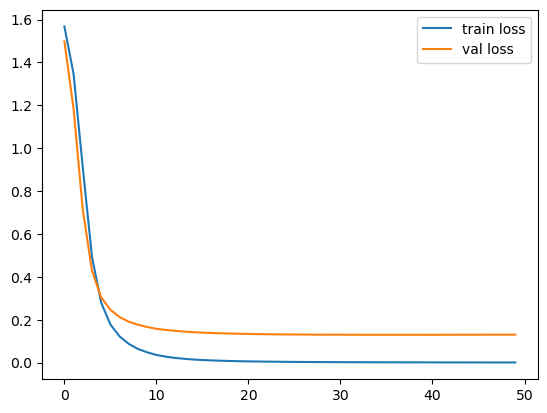

In [19]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

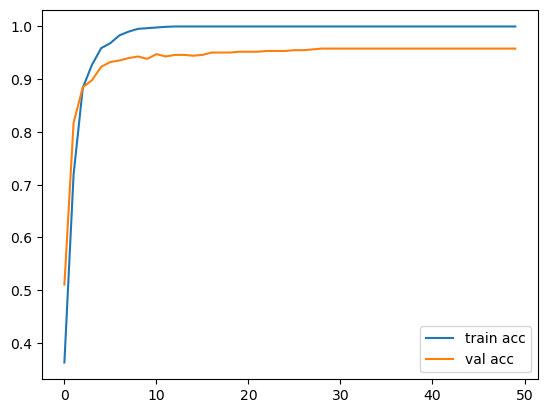

In [20]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()